[1 6 6 ... 6 0 0]
(397, 2)
(180, 2)
(157, 2)
(160, 2)
(104, 2)
(171, 2)
(241, 2)
(30, 2)
(178, 2)
(179, 2)


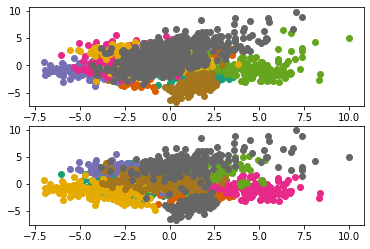

v measure 0.698623970956109
silhouette 0.12501129675703634
davis-bouldin 1.3983629470846934


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_score, davies_bouldin_score


digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

fig, ax = plt.subplots(2,1)

pca = TruncatedSVD(n_components=2)
Y = pca.fit_transform(X)
for digit in digits.target_names:
    p = Y[y == digit]
    ax[0].scatter(p[:,0],p[:,1],color=plt.cm.Dark2(digit))

Nc = 10
kmeans = KMeans(n_clusters=Nc, random_state=0, n_init="auto").fit(X)    
print(kmeans.labels_)
for k in range(Nc):
    p = Y[ kmeans.labels_ == k ] 
    print(p.shape)
    ax[1].scatter(p[:, 0],p[:, 1],color=plt.cm.Dark2(k))

        
plt.show()
print("v measure", v_measure_score(digits.target, kmeans.labels_) )
print("silhouette", silhouette_score(Y, kmeans.labels_) )
print("davis-bouldin", davies_bouldin_score(Y, kmeans.labels_) )


Here we know the ground truth, so we can see how we do by varying the dimensions and number of clusters for the PCA+Kmeans clustering combination

39
37
35
33
31
29
27
25
23
21
19
17
15
13
11
9
7
5
3
1


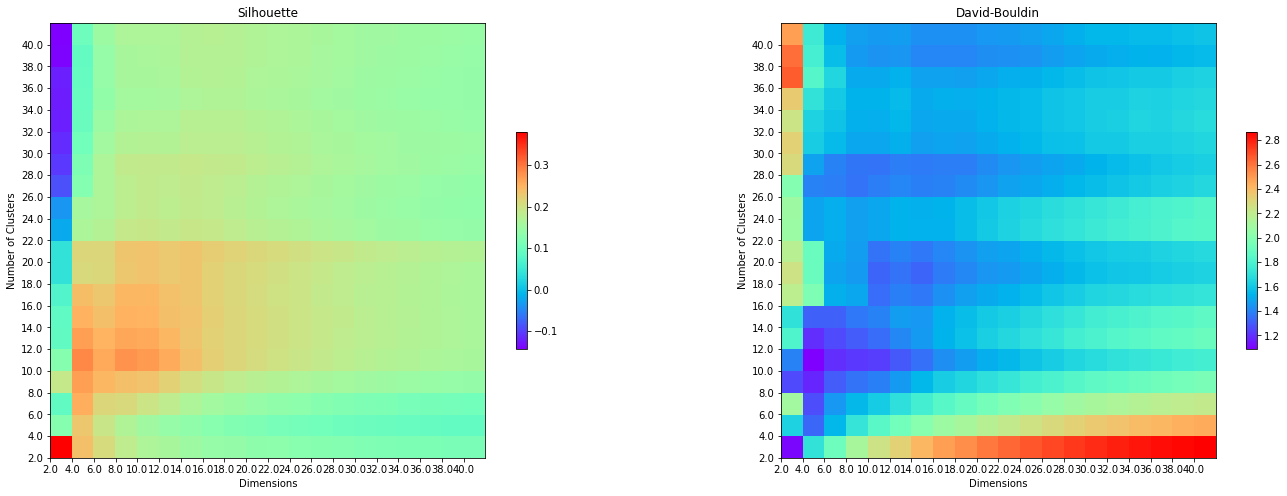

In [5]:
def param_scan(Dmin, Dmax, Dstep, Cmin, Cmax, Cstep, cmap=cm.rainbow):


    sil = np.zeros( (Cmax, Dmax) )
    vm = np.zeros( (Cmax, Dmax) )
    db = np.zeros( (Cmax, Dmax) )

    nd = 0
    
    pca = TruncatedSVD(n_components=Dmax)
    pca.fit(X)
    
    for d in range(Dmin, Dmax, Dstep):
        print(Dmax-d)

        nd += 1
        nc = 0
        for c in range(Cmin, Cmax, Cstep):
            nc += 1
            Y = pca.transform(X)[:,:d]
            kmeans = KMeans(n_clusters=c, random_state=0, n_init="auto").fit(X)    

            sil[c,d] = silhouette_score(Y, kmeans.labels_)
            vm[c,d] = v_measure_score(digits.target, kmeans.labels_)
            db[c,d] = davies_bouldin_score(Y, kmeans.labels_)

    fig, ax = plt.subplots(1, 2, figsize=(24,8)) 

    for i,data in enumerate([ sil, db]):
        cs = ax[i].imshow( data[Cmin::Cstep,Dmin::Dstep], cmap=cmap,  origin="lower",
                      extent=(0, nd, 0, nc) )
        ax[i].set_ylabel("Number of Clusters")
        ax[i].set_xlabel("Dimensions")
        plt.colorbar(cs, shrink=0.5)

        ax[i].set_xticks(np.arange(0,nd), [ "{:.1f}".format(xx) for xx in np.arange(Dmin,Dmax,Dstep)  ])
        ax[i].set_yticks(np.arange(0,nc), [ "{:.1f}".format(xx) for xx in np.arange(Cmin,Cmax,Cstep)  ])

    ax[0].set_title("Silhouette")
    ax[1].set_title("David-Bouldin")

    plt.show()
    plt.close()

Dmin = 2
Dmax = 40+1
Dstep = 2

Cmin = 2
Cmax = 40+1
Cstep = 2

param_scan(Dmin, Dmax, Dstep, Cmin, Cmax, Cstep)

We are looking for high silhouette and low DB. This implies are doing the best clustering either with 2 clusters in 2d, or somewhere between 10 and 20 in 4 to 20 dimensions. Let's zoom in a bit

3
2
1


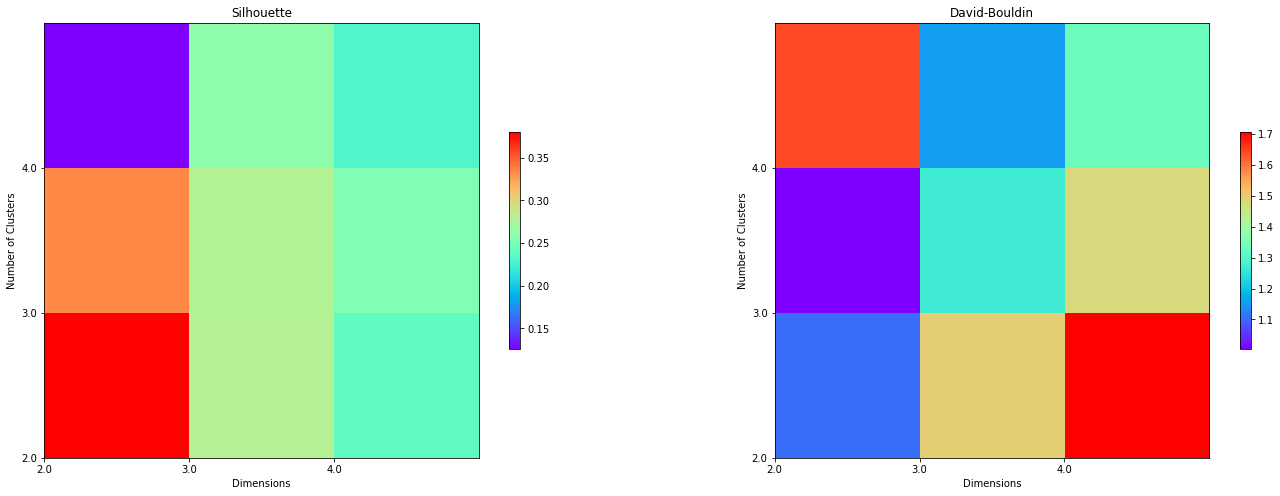

In [3]:
param_scan(2, 5, 1, 2, 5, 1)

There's definitely a peak at 2 clusters in 2 dimensions. We know the correct answer, so we know this is probably not what we want!

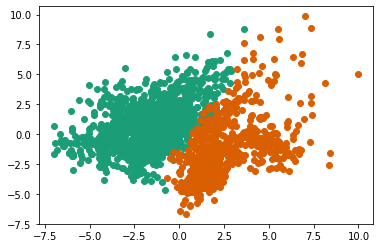

In [6]:
pca = TruncatedSVD(n_components=2)
Y = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)    
for k in range(2):
    p = Y[ kmeans.labels_ == k ] 
    plt.scatter(p[:, 0],p[:, 1],color=plt.cm.Dark2(k))
   
plt.show()
plt.close()

10
9
8
7
6
5
4
3
2
1


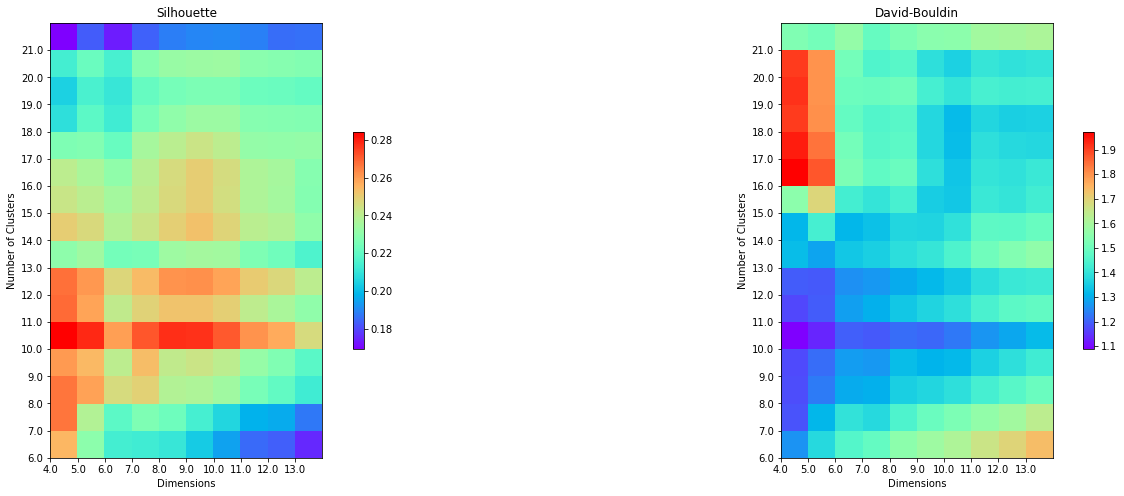

In [7]:
param_scan(4, 14, 1, 6, 22, 1)

This is much better. In dimensions 4 to 10 there is a strong peak at 10 clusters.

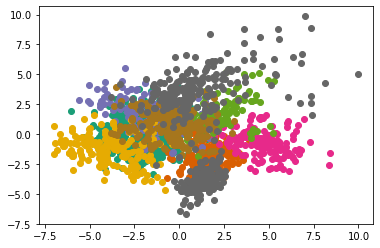

In [8]:
pca = TruncatedSVD(n_components=4)
Y = pca.fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X)    
for k in range(10):
    p = Y[ kmeans.labels_ == k ] 
    plt.scatter(p[:, 0],p[:, 1],color=plt.cm.Dark2(k))
   
plt.show()
plt.close()